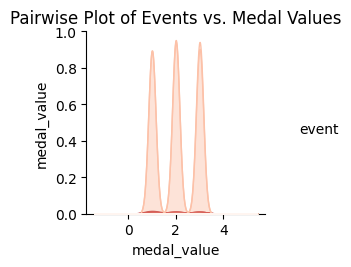

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
medallists = pd.read_csv('paris_olympics2024/paris olympics 2024 dataset updated/medallists.csv')
events = pd.read_csv('paris_olympics2024/paris olympics 2024 dataset updated/events.csv')

# Merge datasets
merged_data = pd.merge(medallists, events, on='event', how='left')

# Map medal types to numeric values
medal_values = {
    'Gold Medal': 3,
    'Silver Medal': 2,
    'Bronze Medal': 1,
    'No Medal': 0
}

merged_data['medal_value'] = merged_data['medal_type'].map(medal_values)

# Select relevant columns for pairwise plotting
pairwise_data = merged_data[['event', 'medal_value']]  # Add other numeric columns if available

# Create a pairwise plot
sns.pairplot(pairwise_data, hue='event', palette='Reds')  # Color by event
plt.title('Pairwise Plot of Events vs. Medal Values')
plt.show()


In [232]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os


print("All libraries are successfully imported!")



All libraries are successfully imported!



Reading file: 3x3 Basketball.csv
                        date                          stage_code event_code  \
0  2024-07-30T18:59:05+02:00  BK3MTEAM3-------------GPA-000100--  BK3MTEAM3   
1  2024-07-30T18:59:05+02:00  BK3MTEAM3-------------GPA-000100--  BK3MTEAM3   
2  2024-07-30T19:26:55+02:00  BK3MTEAM3-------------GPA-000200--  BK3MTEAM3   
3  2024-07-30T19:26:55+02:00  BK3MTEAM3-------------GPA-000200--  BK3MTEAM3   
4  2024-07-30T22:30:21+02:00  BK3MTEAM3-------------GPA-000300--  BK3MTEAM3   

  event_name       event_stage       stage stage_status gender  \
0        Men  Men's Pool Round  Pool Round     FINISHED      M   
1        Men  Men's Pool Round  Pool Round     FINISHED      M   
2        Men  Men's Pool Round  Pool Round     FINISHED      M   
3        Men  Men's Pool Round  Pool Round     FINISHED      M   
4        Men  Men's Pool Round  Pool Round     FINISHED      M   

  discipline_name discipline_code          venue   participant_code  \
0  3x3 Basketball      

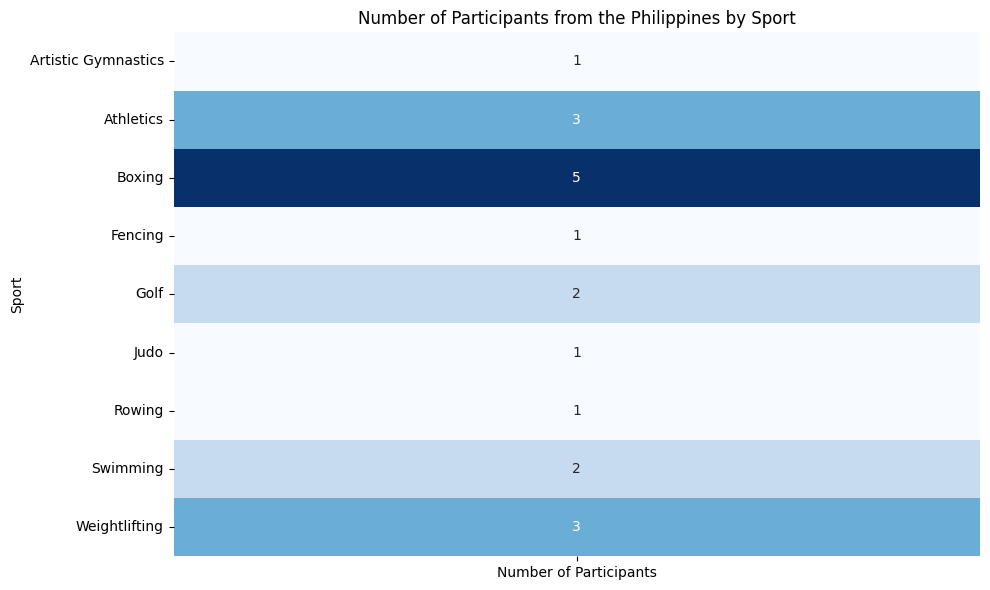

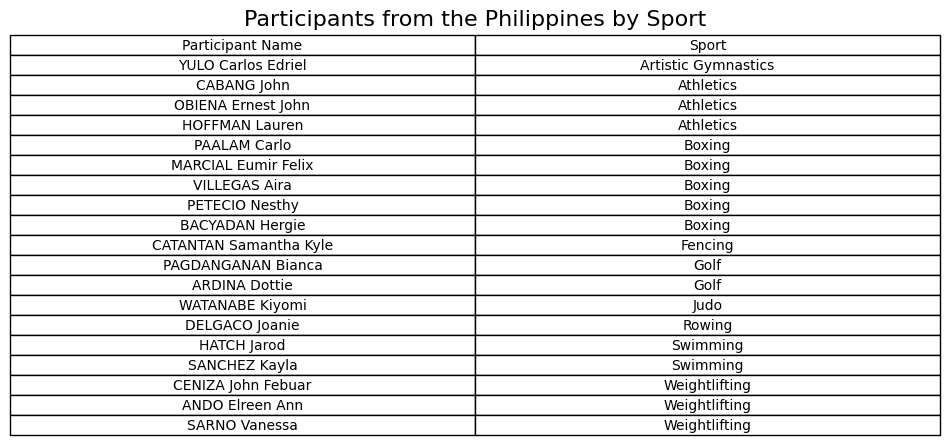

In [31]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the specified folder
results_folder = 'paris_olympics2024./paris olympics 2024 dataset updated/results/'

# Initialize an empty list to store DataFrames
dataframes = []

# Loop through each file in the results folder
for filename in os.listdir(results_folder):
    if filename.endswith('.csv'):  # Check if the file is a CSV
        file_path = os.path.join(results_folder, filename)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Standardize the column names: remove leading/trailing spaces, convert to lowercase
        df.columns = df.columns.str.strip().str.lower()

        # Print the first few rows of each file to verify the data structure
        print(f"\nReading file: {filename}")
        print(df.head())  # Display first few rows
        print("Columns:", df.columns)  # Display columns of the current file
        
        # Rename columns if necessary to maintain consistency
        column_rename_mapping = {
            'participant country': 'participant_country',  # Example variation
            'country': 'participant_country',  # Example variation
            'participant name': 'participant_name',  # Example variation
            'name': 'participant_name'  # Example variation
        }
        df.rename(columns=column_rename_mapping, inplace=True)

        # Check if 'participant_country' column exists after renaming
        if 'participant_country' not in df.columns:
            print(f"'participant_country' column not found in {filename} even after renaming. Skipping this file.")
            continue  # Skip this file if the column is missing

        # Add a new column 'sport' with the sport name derived from the filename (without extension)
        sport_name = filename.split('.')[0]  # Extract sport name from filename
        df['sport'] = sport_name  # Assign sport name to the new column
        
        # Append DataFrame to the list
        dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Display the columns to check for the new 'sport' column
print("\nColumns in the combined DataFrame:", combined_df.columns)

# Filter participants from the Philippines
ph_participants = combined_df[combined_df['participant_country'] == 'Philippines']

# Check how many rows were filtered for participants from the Philippines
print("\nNumber of rows with participants from the Philippines:", len(ph_participants))

# Create a table of unique participants with their sport and country
participant_table = ph_participants[['participant_name', 'sport']].drop_duplicates()

# Rename columns for display
participant_table.columns = ['Participant Name', 'Sport']

# Count the number of unique participants per sport for display
participant_counts = participant_table.groupby('Sport')['Participant Name'].count().reset_index()
participant_counts.columns = ['Sport', 'Number of Participants']

# Set up a figure for the heatmap
plt.figure(figsize=(10, 6))

# Create a heatmap to visualize the number of participants per sport
sns.heatmap(participant_counts.set_index('Sport'), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Number of Participants from the Philippines by Sport')
# plt.xlabel('Number of Participants')
plt.ylabel('Sport')
# plt.xticks(rotation=45)
plt.tight_layout()

# Show the heatmap
plt.show()

# Set up a new figure for the Matplotlib table
fig, ax = plt.subplots(figsize=(10, 4))  # Create a new figure for the table
ax.axis('tight')  # Hide axes
ax.axis('off')  # Hide axes

# Set the title for the table above the table
# Adjust top margin
plt.title('Participants from the Philippines by Sport', fontsize=16, pad=40)  # Increase pad for more space
plt.xlabel('Participant Names', fontsize=12)
plt.ylabel('Sport', fontsize=12)

# Create a table using Matplotlib
table = ax.table(cellText=participant_table.values, colLabels=participant_table.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)  # Disable auto font size
table.set_fontsize(10)  # Set font size
table.scale(1.2, 1.2)  # Scale the table size

# Show the table
plt.show()

# Optional: Save the table to a CSV file
participant_table.to_csv('philippines_participants_table.csv', index=False)


# MEDALS BY **CONTINENT**

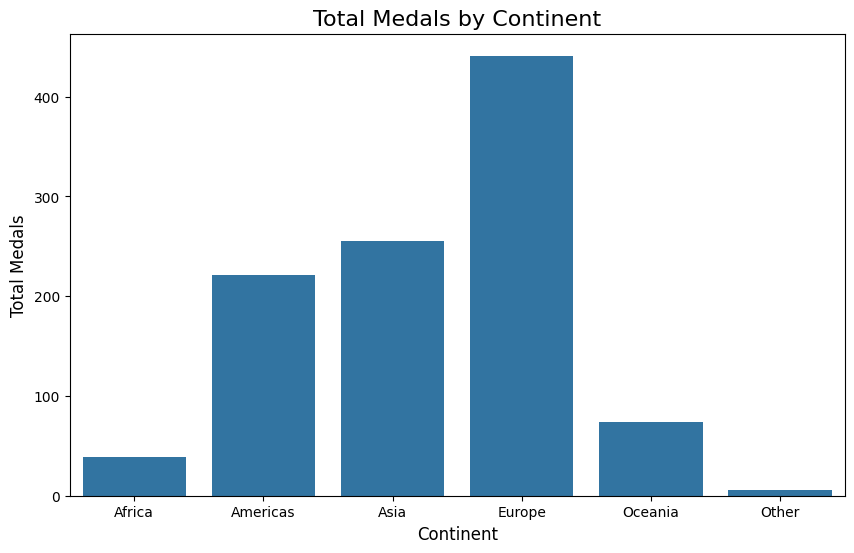

In [23]:
#continent

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 100)

path3 = "paris_olympics2024/paris olympics 2024 dataset updated/medals_total.csv"

df = pd.read_csv(path3, header=0)

americas = ['ANT', 'ARG', 'ARU', 'BAH', 'BAR', 'BIZ', 'BER', 'BOL', 'BRA', 'CAY', 'CAN', 'CHI', 'COL', 'CRC', 'CUB', 'DOM', 'DMA', 'ESA', 'ECU', 'GRN', 'GUA', 'GUY', 'HAI', 'HON', 'JAM', 'MEX', 'NCA', 'PAN', 'PAR', 'PER', 'PUR', 'SKN', 'LCA', 'VIN', 'SUR', 'TTO', 'USA', 'URU', 'VEN', 'IVB', 'ISV']

africa = ['ALG', 'ANG', 'BEN', 'BOT', 'BUR', 'BDI', 'CMR', 'CPV', 'CAF', 'CHA', 'COM', 'CGO', 'COD', 'CIV', 'DJI', 'EGY', 'ERI', 'SWZ', 'ETH', 'GAB', 'GAM', 'GHA', 'GUI', 'GBS', 'GEQ', 'KEN', 'LES', 'LBR', 'LBA', 'MAD', 'MAW', 'MLI', 'MAR', 'MRI', 'MTN', 'MOZ', 'NAM', 'NIG', 'NGR', 'UGA', 'RWA', 'STP', 'SEN', 'SEY', 'SLE', 'SOM', 'RSA', 'SSD', 'SUD', 'TAN', 'TOG', 'TUN', 'ZAM', 'ZIM']

asia = ['AFG', 'BRN', 'BAN', 'BHU', 'BRU', 'CAM', 'CHN', 'KOR', 'HKG', 'IND', 'INA', 'IRI', 'IRQ', 'JPN', 'JOR', 'KAZ', 'KGZ', 'KUW', 'LAO', 'LBN', 'MAS', 'MDV', 'MGL', 'MYA', 'NEP', 'OMA', 'PAK', 'PLE', 'PHI', 'QAT', 'PRK', 'KSA', 'SGP', 'SRI', 'SYR', 'TJK', 'TPE', 'THA', 'TLS', 'TKM', 'UAE', 'UZB', 'VIE', 'YEM']

europe = ['ALB', 'AND', 'ARM', 'AUT', 'AZE', 'BEL', 'BIH', 'BUL', 'CYP', 'CRO', 'CZE', 'DEN', 'ESP', 'EST', 'FIN', 'FRA', 'GEO', 'GER', 'GBR', 'GRE', 'HUN', 'IRL', 'ISL', 'ISR', 'ITA', 'KOS', 'LAT', 'LIE', 'LTU', 'LUX', 'MKD', 'MLT', 'MDA', 'MON', 'MNE', 'NED', 'NOR', 'POL', 'POR', 'ROU', 'SMR', 'SRB', 'SVK', 'SLO', 'SWE', 'SUI', 'TUR', 'UKR']

oceania = ['ASA', 'AUS', 'COK', 'FIJ', 'GUM', 'KIR', 'MHL', 'FSM', 'NRU', 'NZL', 'PLW', 'PNG', 'SOL', 'SAM', 'TGA', 'TUV', 'VAN']

df['continent'] = df['country_code'].apply(lambda x: 'Americas' if x in americas
                                           else 'Africa' if x in africa
                                           else 'Asia' if x in asia
                                           else 'Europe' if x in europe
                                           else 'Oceania' if x in oceania
                                           else 'Other')

continent_totals = df.groupby('continent')['Total'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='continent', y='Total', data=continent_totals)

plt.title('Total Medals by Continent', fontsize=16)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Total Medals', fontsize=12)

plt.show()





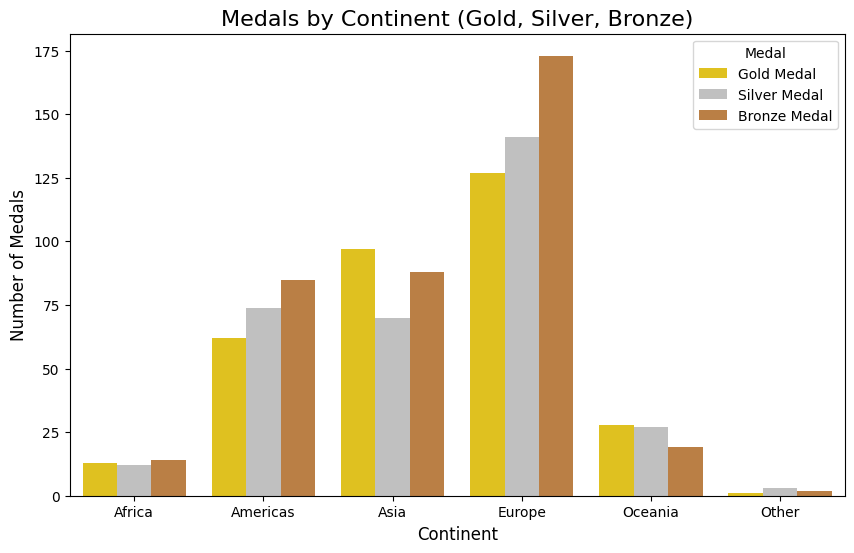

In [18]:
#continent

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 100)

path3 = "paris_olympics2024/paris olympics 2024 dataset updated/medals_total.csv"

df = pd.read_csv(path3, header=0)

americas = ['ANT', 'ARG', 'ARU', 'BAH', 'BAR', 'BIZ', 'BER', 'BOL', 'BRA', 'CAY', 'CAN', 'CHI', 'COL', 'CRC', 'CUB', 'DOM', 'DMA', 'ESA', 'ECU', 'GRN', 'GUA', 'GUY', 'HAI', 'HON', 'JAM', 'MEX', 'NCA', 'PAN', 'PAR', 'PER', 'PUR', 'SKN', 'LCA', 'VIN', 'SUR', 'TTO', 'USA', 'URU', 'VEN', 'IVB', 'ISV']

africa = ['ALG', 'ANG', 'BEN', 'BOT', 'BUR', 'BDI', 'CMR', 'CPV', 'CAF', 'CHA', 'COM', 'CGO', 'COD', 'CIV', 'DJI', 'EGY', 'ERI', 'SWZ', 'ETH', 'GAB', 'GAM', 'GHA', 'GUI', 'GBS', 'GEQ', 'KEN', 'LES', 'LBR', 'LBA', 'MAD', 'MAW', 'MLI', 'MAR', 'MRI', 'MTN', 'MOZ', 'NAM', 'NIG', 'NGR', 'UGA', 'RWA', 'STP', 'SEN', 'SEY', 'SLE', 'SOM', 'RSA', 'SSD', 'SUD', 'TAN', 'TOG', 'TUN', 'ZAM', 'ZIM']

asia = ['AFG', 'BRN', 'BAN', 'BHU', 'BRU', 'CAM', 'CHN', 'KOR', 'HKG', 'IND', 'INA', 'IRI', 'IRQ', 'JPN', 'JOR', 'KAZ', 'KGZ', 'KUW', 'LAO', 'LBN', 'MAS', 'MDV', 'MGL', 'MYA', 'NEP', 'OMA', 'PAK', 'PLE', 'PHI', 'QAT', 'PRK', 'KSA', 'SGP', 'SRI', 'SYR', 'TJK', 'TPE', 'THA', 'TLS', 'TKM', 'UAE', 'UZB', 'VIE', 'YEM']

europe = ['ALB', 'AND', 'ARM', 'AUT', 'AZE', 'BEL', 'BIH', 'BUL', 'CYP', 'CRO', 'CZE', 'DEN', 'ESP', 'EST', 'FIN', 'FRA', 'GEO', 'GER', 'GBR', 'GRE', 'HUN', 'IRL', 'ISL', 'ISR', 'ITA', 'KOS', 'LAT', 'LIE', 'LTU', 'LUX', 'MKD', 'MLT', 'MDA', 'MON', 'MNE', 'NED', 'NOR', 'POL', 'POR', 'ROU', 'SMR', 'SRB', 'SVK', 'SLO', 'SWE', 'SUI', 'TUR', 'UKR']

oceania = ['ASA', 'AUS', 'COK', 'FIJ', 'GUM', 'KIR', 'MHL', 'FSM', 'NRU', 'NZL', 'PLW', 'PNG', 'SOL', 'SAM', 'TGA', 'TUV', 'VAN']

df['continent'] = df['country_code'].apply(lambda x: 'Americas' if x in americas
                                           else 'Africa' if x in africa
                                           else 'Asia' if x in asia
                                           else 'Europe' if x in europe
                                           else 'Oceania' if x in oceania
                                           else 'Other')

continent_totals = df.groupby('continent')[['Gold Medal', 'Silver Medal', 'Bronze Medal']].sum().reset_index()

df_melted = continent_totals.melt(id_vars=['continent'], value_vars=['Gold Medal', 'Silver Medal', 'Bronze Medal'],
                                  var_name='Medal', value_name='Count')

medal_colors = {'Gold Medal': '#FFD700', 'Silver Medal': '#C0C0C0', 'Bronze Medal': '#CD7F32'}

plt.figure(figsize=(10, 6))
sns.barplot(x='continent', y='Count', hue='Medal', data=df_melted, palette=medal_colors)

plt.title('Medals by Continent (Gold, Silver, Bronze)', fontsize=16)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)

plt.show()

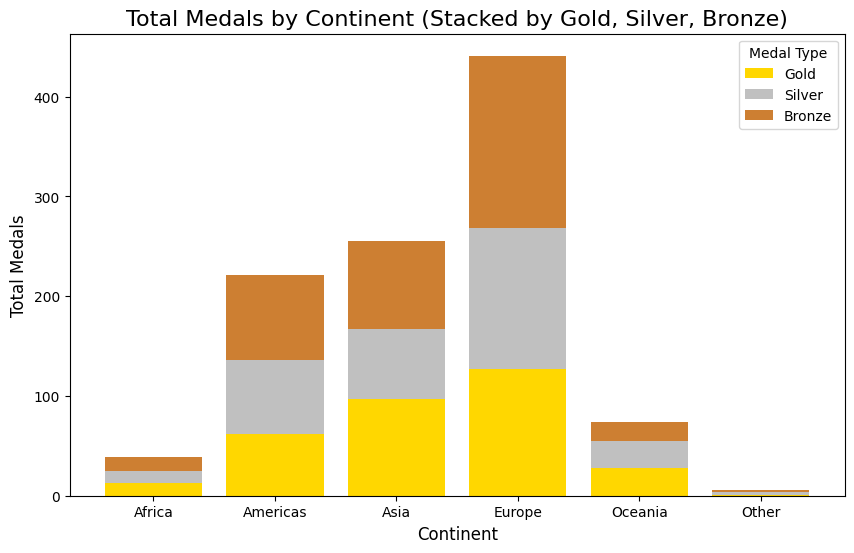

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

path3 = "paris_olympics2024/paris olympics 2024 dataset updated/medals_total.csv"
df = pd.read_csv(path3, header=0)

americas = ['ANT', 'ARG', 'ARU', 'BAH', 'BAR', 'BIZ', 'BER', 'BOL', 'BRA', 'CAY', 'CAN', 'CHI', 'COL', 'CRC', 'CUB', 'DOM', 'DMA', 'ESA', 'ECU', 'GRN', 'GUA', 'GUY', 'HAI', 'HON', 'JAM', 'MEX', 'NCA', 'PAN', 'PAR', 'PER', 'PUR', 'SKN', 'LCA', 'VIN', 'SUR', 'TTO', 'USA', 'URU', 'VEN', 'IVB', 'ISV']
africa = ['ALG', 'ANG', 'BEN', 'BOT', 'BUR', 'BDI', 'CMR', 'CPV', 'CAF', 'CHA', 'COM', 'CGO', 'COD', 'CIV', 'DJI', 'EGY', 'ERI', 'SWZ', 'ETH', 'GAB', 'GAM', 'GHA', 'GUI', 'GBS', 'GEQ', 'KEN', 'LES', 'LBR', 'LBA', 'MAD', 'MAW', 'MLI', 'MAR', 'MRI', 'MTN', 'MOZ', 'NAM', 'NIG', 'NGR', 'UGA', 'RWA', 'STP', 'SEN', 'SEY', 'SLE', 'SOM', 'RSA', 'SSD', 'SUD', 'TAN', 'TOG', 'TUN', 'ZAM', 'ZIM']
asia = ['AFG', 'BRN', 'BAN', 'BHU', 'BRU', 'CAM', 'CHN', 'KOR', 'HKG', 'IND', 'INA', 'IRI', 'IRQ', 'JPN', 'JOR', 'KAZ', 'KGZ', 'KUW', 'LAO', 'LBN', 'MAS', 'MDV', 'MGL', 'MYA', 'NEP', 'OMA', 'PAK', 'PLE', 'PHI', 'QAT', 'PRK', 'KSA', 'SGP', 'SRI', 'SYR', 'TJK', 'TPE', 'THA', 'TLS', 'TKM', 'UAE', 'UZB', 'VIE', 'YEM']
europe = ['ALB', 'AND', 'ARM', 'AUT', 'AZE', 'BEL', 'BIH', 'BUL', 'CYP', 'CRO', 'CZE', 'DEN', 'ESP', 'EST', 'FIN', 'FRA', 'GEO', 'GER', 'GBR', 'GRE', 'HUN', 'IRL', 'ISL', 'ISR', 'ITA', 'KOS', 'LAT', 'LIE', 'LTU', 'LUX', 'MKD', 'MLT', 'MDA', 'MON', 'MNE', 'NED', 'NOR', 'POL', 'POR', 'ROU', 'SMR', 'SRB', 'SVK', 'SLO', 'SWE', 'SUI', 'TUR', 'UKR']
oceania = ['ASA', 'AUS', 'COK', 'FIJ', 'GUM', 'KIR', 'MHL', 'FSM', 'NRU', 'NZL', 'PLW', 'PNG', 'SOL', 'SAM', 'TGA', 'TUV', 'VAN']

df['continent'] = df['country_code'].apply(lambda x: 'Americas' if x in americas
                                           else 'Africa' if x in africa
                                           else 'Asia' if x in asia
                                           else 'Europe' if x in europe
                                           else 'Oceania' if x in oceania
                                           else 'Other')

continent_totals = df.groupby('continent')[['Gold Medal', 'Silver Medal', 'Bronze Medal']].sum().reset_index()

colors = ['#FFD700', '#C0C0C0', '#CD7F32']

plt.figure(figsize=(10, 6))
plt.bar(continent_totals['continent'], continent_totals['Gold Medal'], color=colors[0], label='Gold')
plt.bar(continent_totals['continent'], continent_totals['Silver Medal'], bottom=continent_totals['Gold Medal'], color=colors[1], label='Silver')
plt.bar(continent_totals['continent'], continent_totals['Bronze Medal'], bottom=continent_totals['Gold Medal'] + continent_totals['Silver Medal'], color=colors[2], label='Bronze')

plt.title('Total Medals by Continent (Stacked by Gold, Silver, Bronze)', fontsize=16)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Total Medals', fontsize=12)

plt.legend(title='Medal Type')

plt.show()

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
path3 = "paris_olympics2024/paris olympics 2024 dataset updated/medals_total.csv"
df = pd.read_csv(path3, header=0)

# Define continents and corresponding country codes
americas = ['ANT', 'ARG', 'ARU', 'BAH', 'BAR', 'BIZ', 'BER', 'BOL', 'BRA', 'CAY', 'CAN', 'CHI', 'COL', 'CRC', 'CUB', 'DOM', 'DMA', 'ESA', 'ECU', 'GRN', 'GUA', 'GUY', 'HAI', 'HON', 'JAM', 'MEX', 'NCA', 'PAN', 'PAR', 'PER', 'PUR', 'SKN', 'LCA', 'VIN', 'SUR', 'TTO', 'USA', 'URU', 'VEN', 'IVB', 'ISV']
africa = ['ALG', 'ANG', 'BEN', 'BOT', 'BUR', 'BDI', 'CMR', 'CPV', 'CAF', 'CHA', 'COM', 'CGO', 'COD', 'CIV', 'DJI', 'EGY', 'ERI', 'SWZ', 'ETH', 'GAB', 'GAM', 'GHA', 'GUI', 'GBS', 'GEQ', 'KEN', 'LES', 'LBR', 'LBA', 'MAD', 'MAW', 'MLI', 'MAR', 'MRI', 'MTN', 'MOZ', 'NAM', 'NIG', 'NGR', 'UGA', 'RWA', 'STP', 'SEN', 'SEY', 'SLE', 'SOM', 'RSA', 'SSD', 'SUD', 'TAN', 'TOG', 'TUN', 'ZAM', 'ZIM']
asia = ['AFG', 'BRN', 'BAN', 'BHU', 'BRU', 'CAM', 'CHN', 'KOR', 'HKG', 'IND', 'INA', 'IRI', 'IRQ', 'JPN', 'JOR', 'KAZ', 'KGZ', 'KUW', 'LAO', 'LBN', 'MAS', 'MDV', 'MGL', 'MYA', 'NEP', 'OMA', 'PAK', 'PLE', 'PHI', 'QAT', 'PRK', 'KSA', 'SGP', 'SRI', 'SYR', 'TJK', 'TPE', 'THA', 'TLS', 'TKM', 'UAE', 'UZB', 'VIE', 'YEM']
europe = ['ALB', 'AND', 'ARM', 'AUT', 'AZE', 'BEL', 'BIH', 'BUL', 'CYP', 'CRO', 'CZE', 'DEN', 'ESP', 'EST', 'FIN', 'FRA', 'GEO', 'GER', 'GBR', 'GRE', 'HUN', 'IRL', 'ISL', 'ISR', 'ITA', 'KOS', 'LAT', 'LIE', 'LTU', 'LUX', 'MKD', 'MLT', 'MDA', 'MON', 'MNE', 'NED', 'NOR', 'POL', 'POR', 'ROU', 'SMR', 'SRB', 'SVK', 'SLO', 'SWE', 'SUI', 'TUR', 'UKR']
oceania = ['ASA', 'AUS', 'COK', 'FIJ', 'GUM', 'KIR', 'MHL', 'FSM', 'NRU', 'NZL', 'PLW', 'PNG', 'SOL', 'SAM', 'TGA', 'TUV', 'VAN']

# Add a new column for continent
df['continent'] = df['country_code'].apply(lambda x: 'Americas' if x in americas
                                           else 'Africa' if x in africa
                                           else 'Asia' if x in asia
                                           else 'Europe' if x in europe
                                           else 'Oceania' if x in oceania
                                           else 'Other')

# Melt the DataFrame to long format for seaborn boxplot
df_melted = df.melt(id_vars=['continent'], value_vars=['Gold Medal', 'Silver Medal', 'Bronze Medal'],
                    var_name='Medal', value_name='Count')

# Colors for Gold, Silver, and Bronze
medal_colors = {'Gold Medal': '#FFD700', 'Silver Medal': '#C0C0C0', 'Bronze Medal': '#CD7F32'}

# Plot the data using seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x='continent', y='Count', hue='Medal', data=df_melted, palette=medal_colors)

# Add title and labels
plt.title('Distribution of Medals by Continent and Medal Type', fontsize=16)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)

# Show the plot
plt.show()

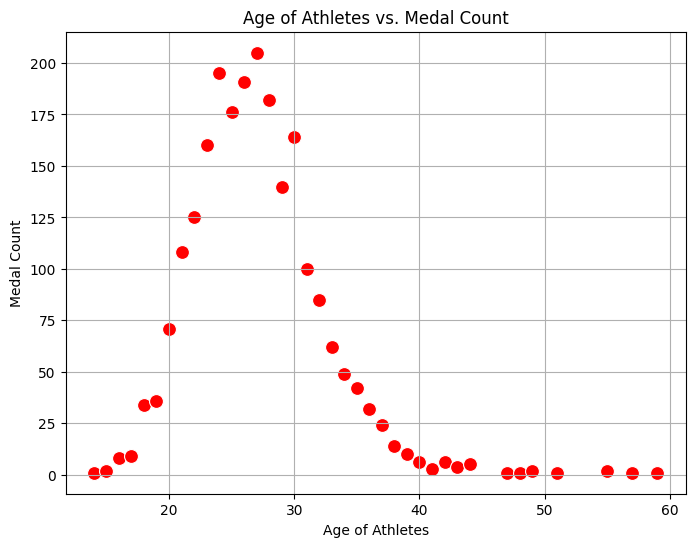

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

athletes = pd.read_csv('paris_olympics2024/paris olympics 2024 dataset updated/athletes.csv')
medallists = pd.read_csv('paris_olympics2024/paris olympics 2024 dataset updated/medallists.csv')


athletes['birth_date'] = pd.to_datetime(athletes['birth_date'])
current_year = datetime.now().year
athletes['age'] = current_year - athletes['birth_date'].dt.year

merged_data = pd.merge(medallists, athletes, on='name')


age_medal_count = merged_data.groupby('age')['medal_type'].count().reset_index()
age_medal_count.columns = ['age', 'medal_count']

plt.figure(figsize=(8, 6))
sns.scatterplot(data=age_medal_count, x='age', y='medal_count', s=100, color='red')

plt.title('Age of Athletes vs. Medal Count')
plt.xlabel('Age of Athletes')
plt.ylabel('Medal Count')
plt.grid(True)
plt.show()

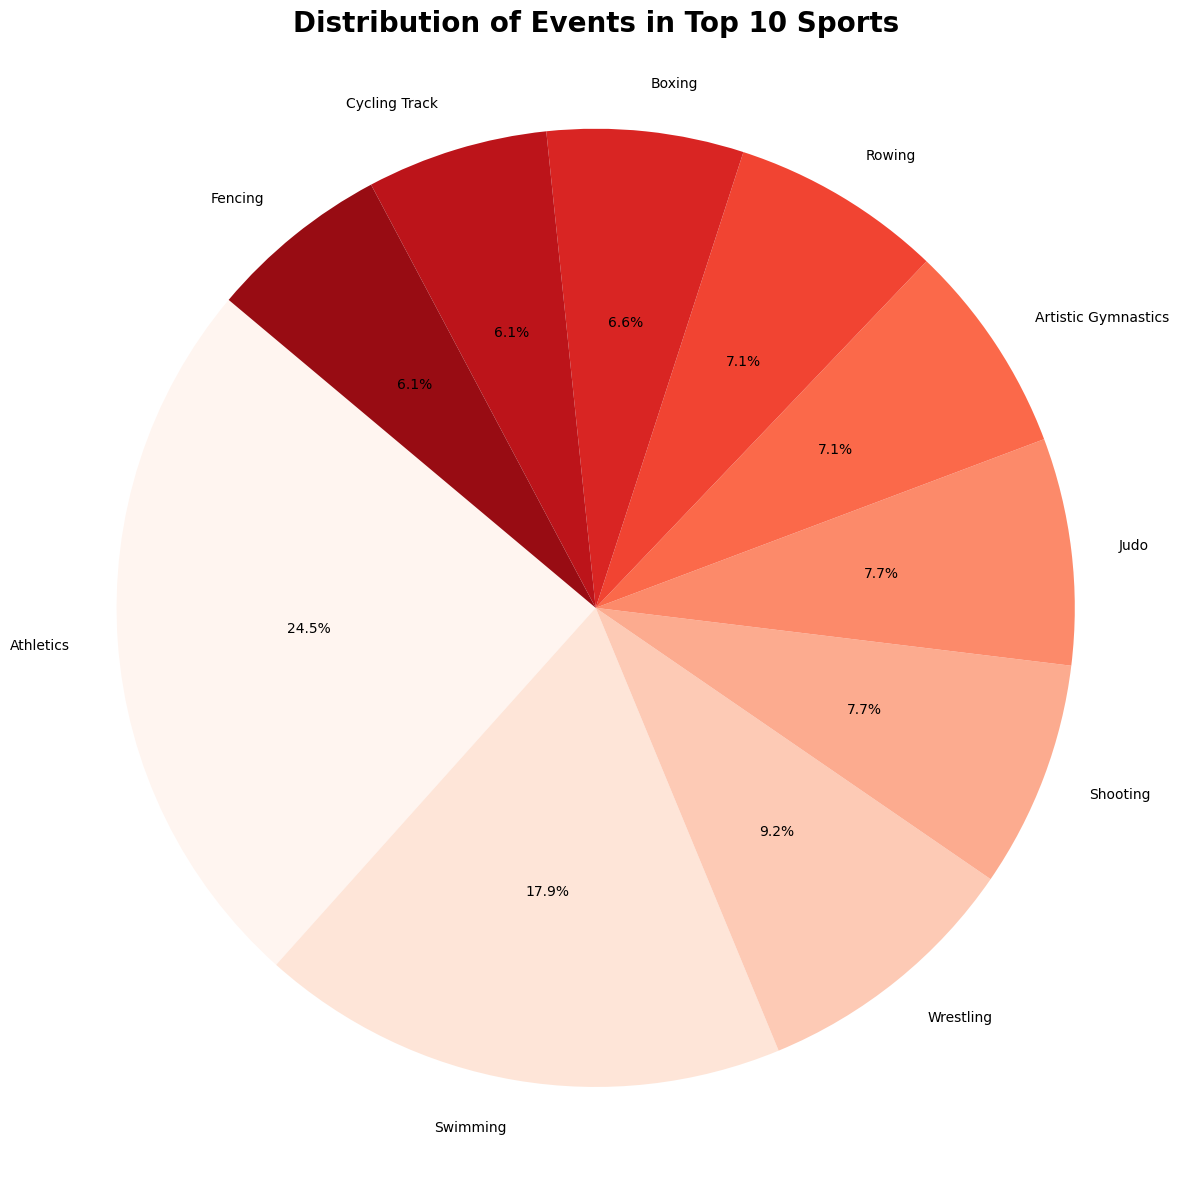

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

events_df = pd.read_csv('paris_olympics2024/paris olympics 2024 dataset updated/events.csv')

events_per_sport = events_df['sport'].value_counts()

sport_labels = events_per_sport.index[:10]
sport_sizes = events_per_sport.values[:10]

num_colors = len(sport_labels)
colors = [plt.cm.Reds(i / num_colors) for i in range(num_colors)] 

plt.figure(figsize=(12, 12))


plt.pie(sport_sizes, labels=sport_labels, autopct='%1.1f%%', startangle=140, colors=colors)


plt.title(f"Distribution of Events in Top {len(sport_labels)} Sports", fontsize=20, fontweight='bold')
plt.axis('equal')  
plt.tight_layout()
plt.show()


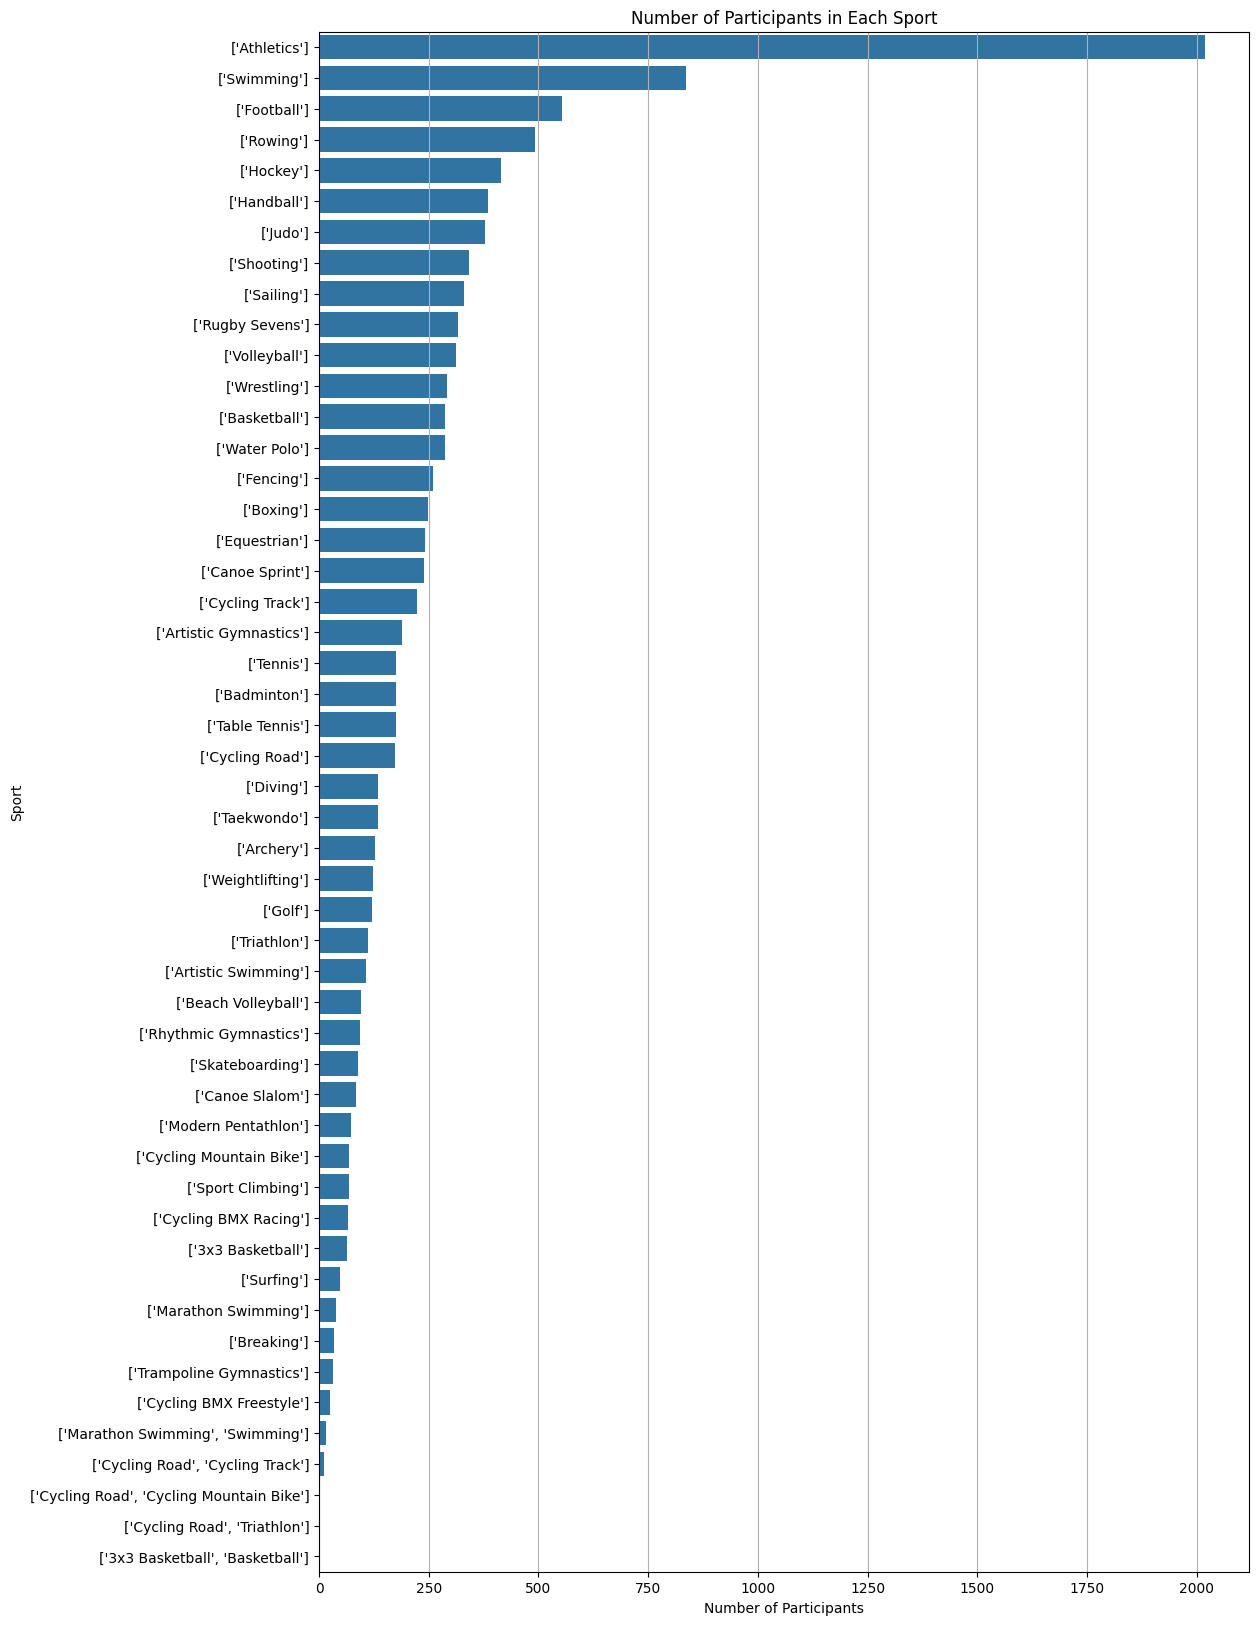

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Step 1: Load the CSV file for athletes (adjust path as needed)
athletes_df = pd.read_csv('paris_olympics2024./paris olympics 2024 dataset updated/athletes.csv')

# Step 2: Calculate the number of participants in each sport
participants_per_sport = athletes_df['disciplines'].value_counts().reset_index()
participants_per_sport.columns = ['Sport', 'Number of Participants']

# Step 3: Create a bar plot to visualize the number of participants in each sport
plt.figure(figsize=(12, 20))
sns.barplot(x='Number of Participants', y='Sport', data=participants_per_sport)
plt.title('Number of Participants in Each Sport')
plt.xlabel('Number of Participants')
plt.ylabel('Sport')
plt.grid(axis='x')
plt.show()


### **DESCRIPTIVE STATISTICS**


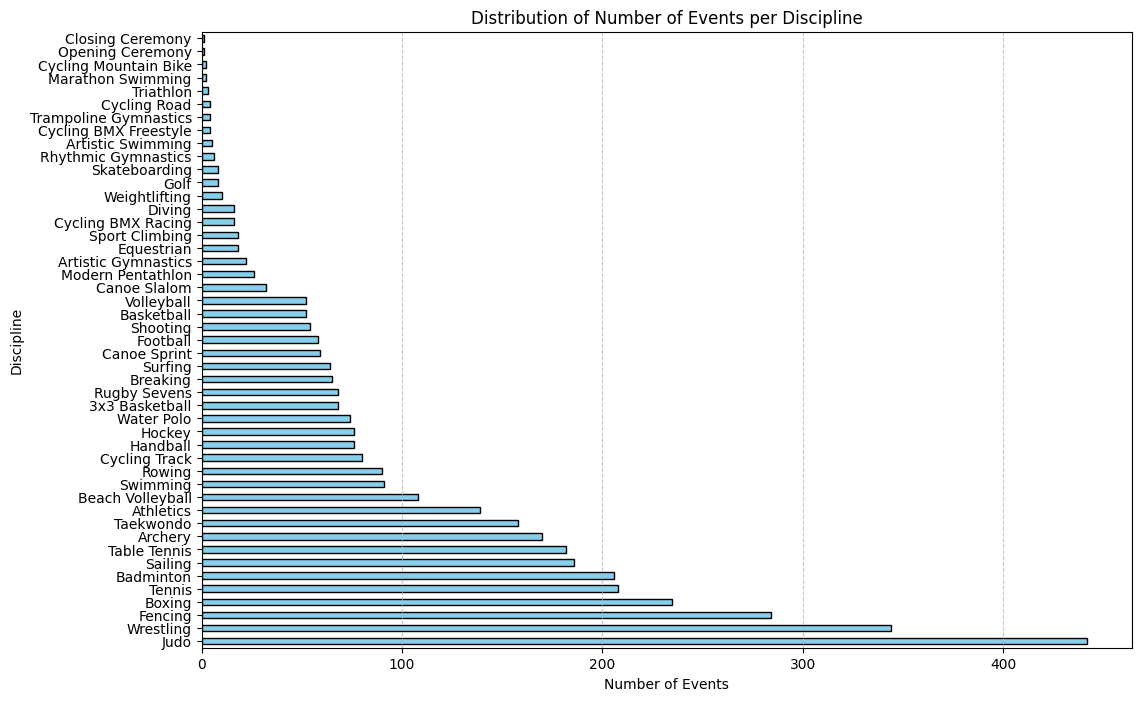

In [4]:
# TANLOI 2 DISTRIBUTION OF EVENTS PER DISCIPLINE
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r'paris_olympics2024\paris olympics 2024 dataset\schedules.csv')

discipline_event_count = df['discipline'].value_counts()

plt.figure(figsize=(12, 8))
discipline_event_count.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Events per Discipline')
plt.xlabel('Number of Events')
plt.ylabel('Discipline')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


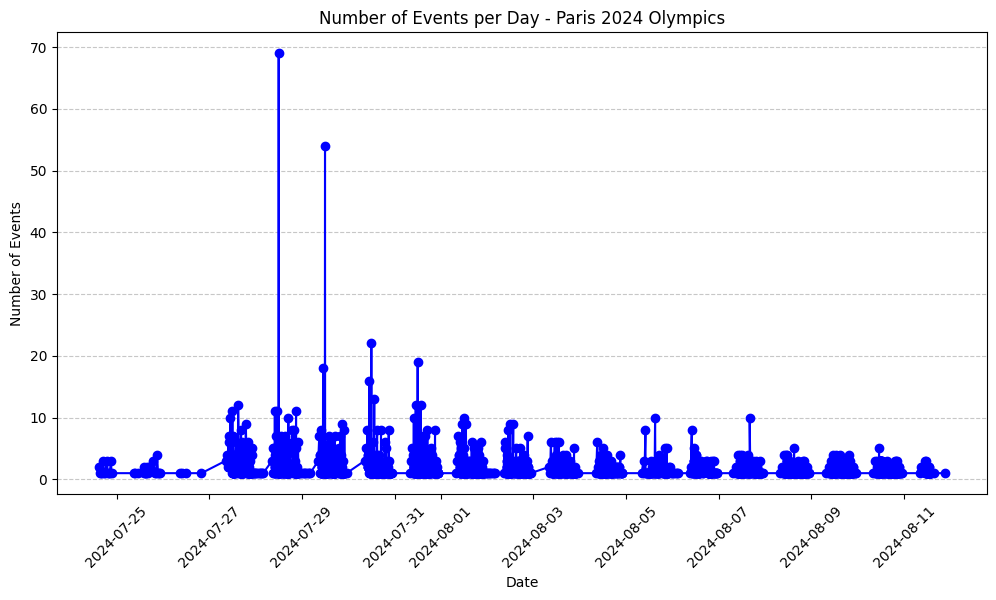

In [28]:
#TANLOI 1 NUMEBR OF EVENTS SA USA KA ADLAW
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'paris_olympics2024\paris olympics 2024 dataset\schedules.csv')

df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')

events_per_day = df['start_date'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(events_per_day.index, events_per_day.values, marker='o', linestyle='-', color='b')
plt.title('Number of Events per Day - Paris 2024 Olympics')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

df.set_index('start_date', inplace=True)  
events_per_week = df.resample('W').size() 



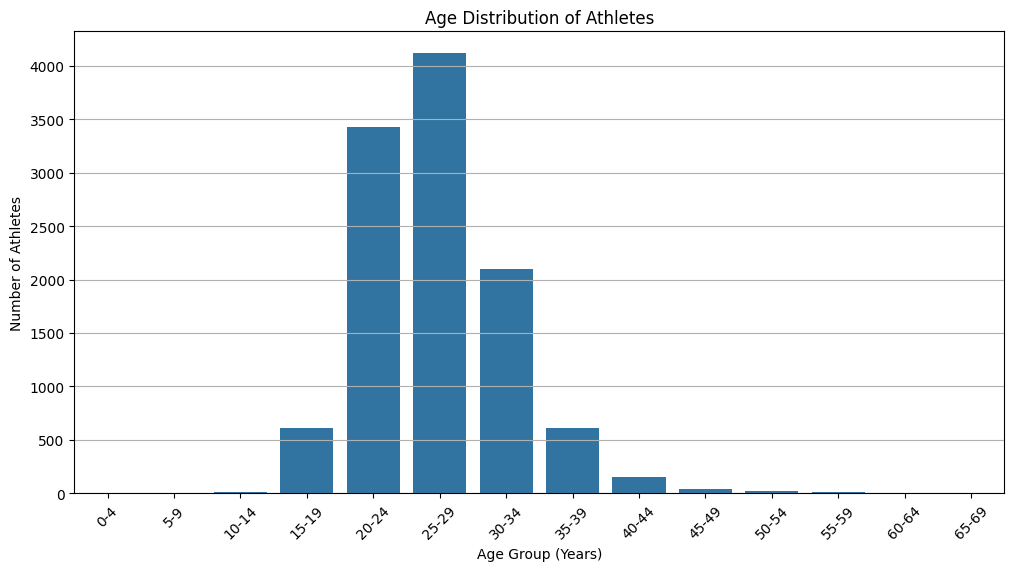

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load athletes CSV
athletes_df = pd.read_csv('paris_olympics2024./paris olympics 2024 dataset updated/athletes.csv')

# Calculate age
athletes_df['birth_date'] = pd.to_datetime(athletes_df['birth_date'])
athletes_df['age'] = (datetime.now() - athletes_df['birth_date']).dt.days // 365

# Create age bins
bins = range(0, athletes_df['age'].max() + 5, 5)
labels = [f"{i}-{i+4}" for i in bins[:-1]]
athletes_df['age_group'] = pd.cut(athletes_df['age'], bins=bins, labels=labels, right=False)

# Plot age distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=athletes_df, x='age_group')
plt.title('Age Distribution of Athletes')
plt.xlabel('Age Group (Years)')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


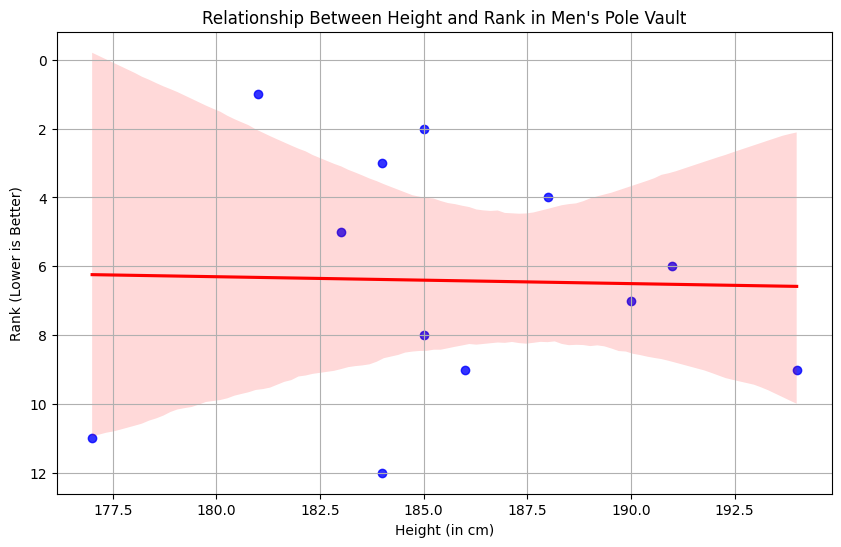

Correlation between height and rank in Men's Pole Vault: 0.03


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV files
athletes_df = pd.read_csv('paris_olympics2024./paris olympics 2024 dataset updated/athletes.csv')
athletics_df = pd.read_csv('paris_olympics2024./paris olympics 2024 dataset updated/results/Athletics.csv')

# Filter data for Men's Pole Vault Final
pole_vault_df = athletics_df[athletics_df['event_stage'] == "Men's Pole Vault Final"][['participant_name', 'rank']]

# Merge dataframes
merged_df = pd.merge(pole_vault_df, athletes_df, left_on='participant_name', right_on='name', how='inner')

# Select and clean columns
height_rank_df = merged_df[['height', 'rank']].dropna()
height_rank_df['rank'] = height_rank_df['rank'].astype(int)

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='height', y='rank', data=height_rank_df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Relationship Between Height and Rank in Men\'s Pole Vault')
plt.xlabel('Height (in cm)')
plt.ylabel('Rank (Lower is Better)')
plt.gca().invert_yaxis()  # Best rank (1) at the top
plt.grid(True)
plt.show()

# Correlation analysis
correlation = height_rank_df['height'].corr(height_rank_df['rank'])
print(f'Correlation between height and rank in Men\'s Pole Vault: {correlation:.2f}')


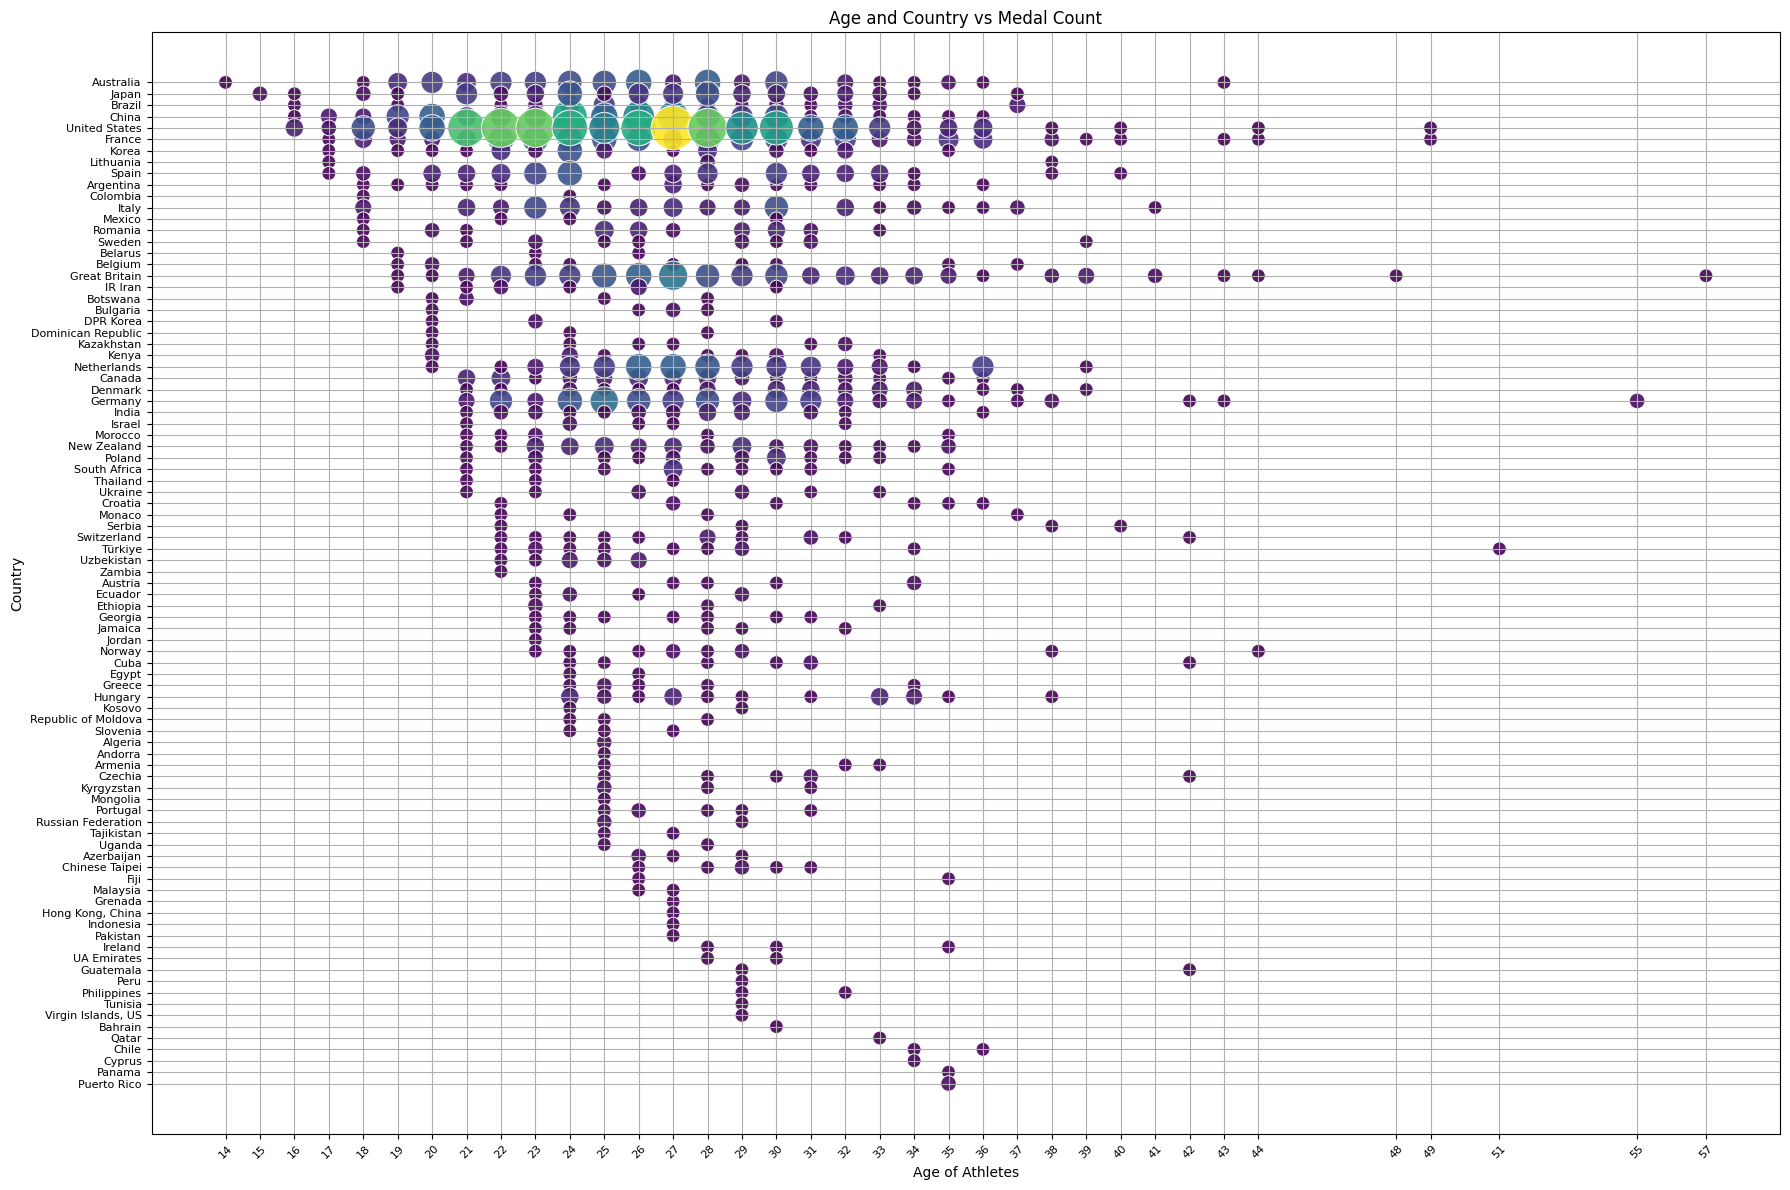

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

athletes = pd.read_csv('paris_olympics2024/paris olympics 2024 dataset updated/athletes.csv')
medallists = pd.read_csv('paris_olympics2024/paris olympics 2024 dataset updated/medallists.csv')

athletes['birth_date'] = pd.to_datetime(athletes['birth_date'])
current_year = datetime.now().year
athletes['age'] = current_year - athletes['birth_date'].dt.year

merged_data = pd.merge(medallists, athletes, on='name')

age_country_medal_count = merged_data.groupby(['age', 'residence_country'])['medal_type'].count().reset_index()
age_country_medal_count.columns = ['age', 'country', 'medal_count']

plt.figure(figsize=(18, 12))
scatter = sns.scatterplot(data=age_country_medal_count, x='age', y='country', size='medal_count', 
                          sizes=(100, 1000), hue='medal_count', palette='viridis', legend=False, alpha=0.9)

plt.title('Age and Country vs Medal Count', fontsize=12)
plt.xlabel('Age of Athletes', fontsize=10)
plt.ylabel('Country', fontsize=10)
plt.grid(True)

plt.xticks(ticks=age_country_medal_count['age'].unique(), rotation=45, fontsize=8)

plt.yticks(fontsize=8)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)  # Adjust margins

plt.tight_layout()
plt.show()

  country_code  Gold Medal  Silver Medal  Bronze Medal  Total
0          USA          40            44            42    126
1          CHN          40            27            24     91
2          JPN          20            12            13     45
3          AUS          18            19            16     53
4          FRA          16            26            22     64


C:\Users\Jeecoo\AppData\Local\Temp\ipykernel_114524\1637096242.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country_code', y='Total', data=medal_total, palette='viridis')


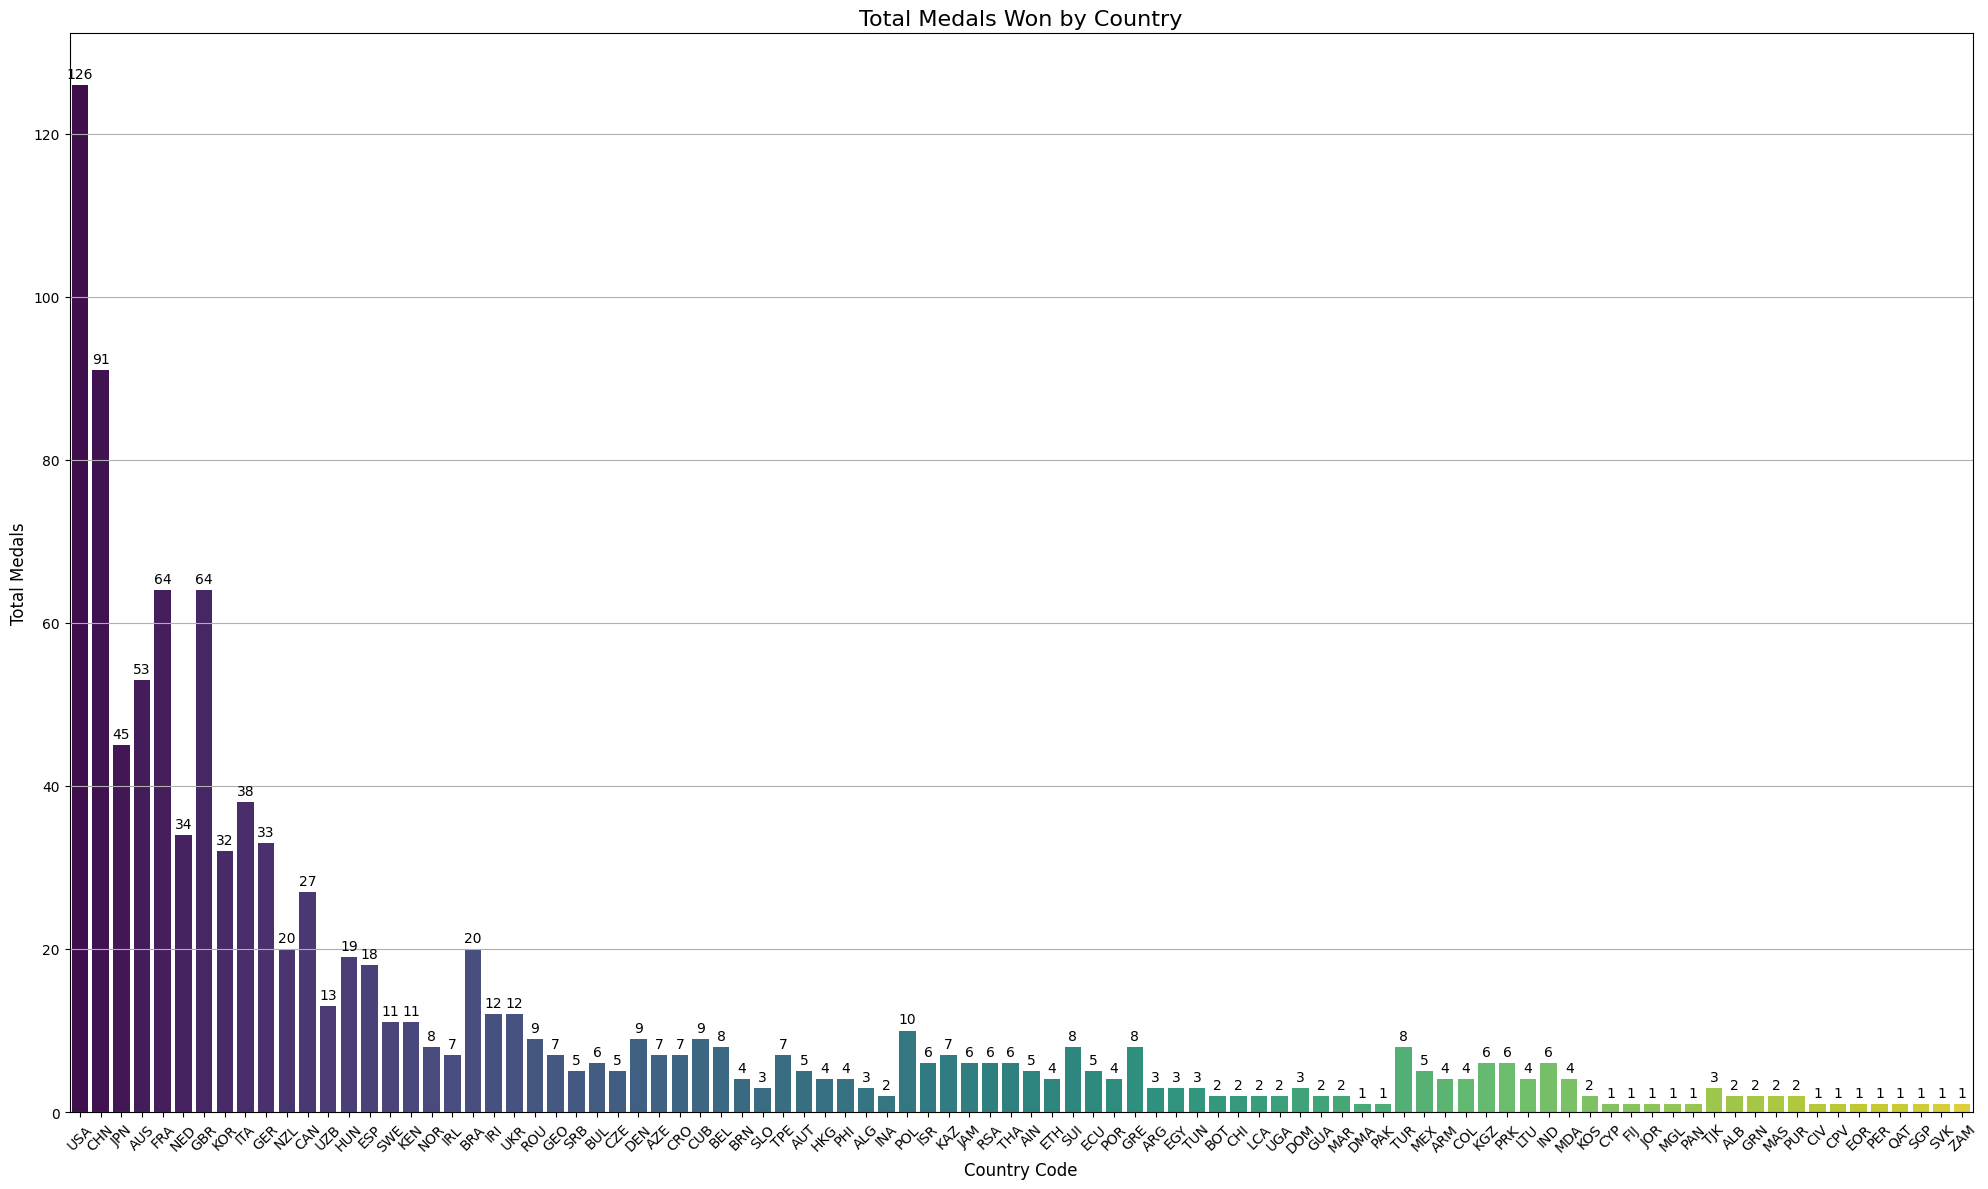

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


medal_total = pd.read_csv('paris_olympics2024/paris olympics 2024 dataset updated/medals_total.csv')

print(medal_total.head())


plt.figure(figsize=(20, 12))

sns.barplot(x='country_code', y='Total', data=medal_total, palette='viridis')

plt.title('Total Medals Won by Country', fontsize=16)
plt.xlabel('Country Code', fontsize=12)
plt.ylabel('Total Medals', fontsize=12)

for index, value in enumerate(medal_total['Total']):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout() 
plt.show()